## Student Performance Indicator

<b>Life cycle of Machine learning Project</b>
<ul>
<li>Understanding the Problem Statement</li>
<li>Data Collection</li>
<li>Data Checks to perform</li>
<li>Exploratory data analysis</li>
<li>Data Pre-Processing</li>
<li>Model Training</li>
<li>Choose best model</li>
</ul>

<h2>1)Problem Statement</h2>
<ul>
<li>This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
</li>
</ul>

<h2>2) Data Collection</h2>
<ul><li>Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977</li>
</ul>
<ul><li>The data consists of 8 column and 1000 rows.</li></ul>


<h3>2.1 Import Data and Required Packages</h3>
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import the CSV Data as Pandas DataFrame

In [45]:
df = pd.read_csv('data/stud.csv')

## Show Top 5 Records

In [46]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Shape of the dataset

In [47]:
df.shape

(1000, 8)

<h3>2.2 Dataset information</h3>
<ul>
<li>gender : sex of students -> (Male/female)</li>
<li>race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)</li>
<li>parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)</li>
<li>lunch : having lunch before test (standard or free/reduced)</li>
<li>test preparation course : complete or not complete before test</li>
<li>math score</li>
<li>reading score</li>
<li>writing score</li>
</ul>

<h2>3. Data Checks to perform</h2>
<ul>
<li>Check Missing values</li>
<li>Check Duplicates</li>
<li>Check Data type</li>
<li>Check the number of unique values of each column</li>
<li>Check Statistics of data set</li>
<li>Check Various categories present in the different categorical column</li>
</ul>

<h3>3.1 Check Missing Values</h3>

In [48]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing values in the dataset

<h3>Check Duplicates</h3>

In [49]:
#Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<h3>3.4 Checking the number of unique values of each column</h3>

In [50]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

<h3>3.5 Check statistics of data set</h3>

In [51]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<h4>Insight</h4>
<ul>
<li>From above description of numerical data, all means are very close to each other - between 66 and 68.05</li>
<li>All standard deviations are also close - between 14.6 and 15.19</li>
<li>While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17</li>
</ul>

<h3>Exploring Data</h3>

In [52]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [53]:
print("Categories in 'gender' variable: ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'Parental level of Education' variable: ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())

print("Categories in 'Test preparation Course' variable: ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'Parental level of Education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'Test preparation Course' variable:  ['none' 'completed']


In [54]:
# Define numerical & categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print columns
print('We have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))


We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [55]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


<h3>3.8 Adding columns for "Total Score" and "Average"</h3>

In [56]:
df['Total Score'] = df['math_score']+df['reading_score']+df['writing_score']
df['Avg Score'] = df['Total Score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Avg Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [57]:
reading_full = df[df['reading_score']==100]['Avg Score'].count()
print(f"Number of students with full marks in Reading :{reading_full}")

math_full = df[df['math_score']==100]['Avg Score'].count()
print(f"Number of students with full marks in Maths :{math_full}")

writing_full = df[df['writing_score']==100]['Avg Score'].count()
print(f"Number of students with full marks in Writing :{writing_full}")

Number of students with full marks in Reading :17
Number of students with full marks in Maths :7
Number of students with full marks in Writing :14


In [58]:
reading_less_20 = df[df['reading_score'] <= 20]['Avg Score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['Avg Score'].count()
math_less_20 = df[df['math_score'] <= 20]['Avg Score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


<h4>Insights</h4>
<ul>
<li>From above values we get students have performed the worst in Maths</li>
<li>Best performance is in reading section</li>
</ul>

<h2>4. Exploring Data(Visualization)</h2>
<h3>Visualize average score distribution to make some conclusion</h3>
<ul>
<li>Histogram</li>
<li>Kernel Distribution Function(KDE)</li>
</ul>

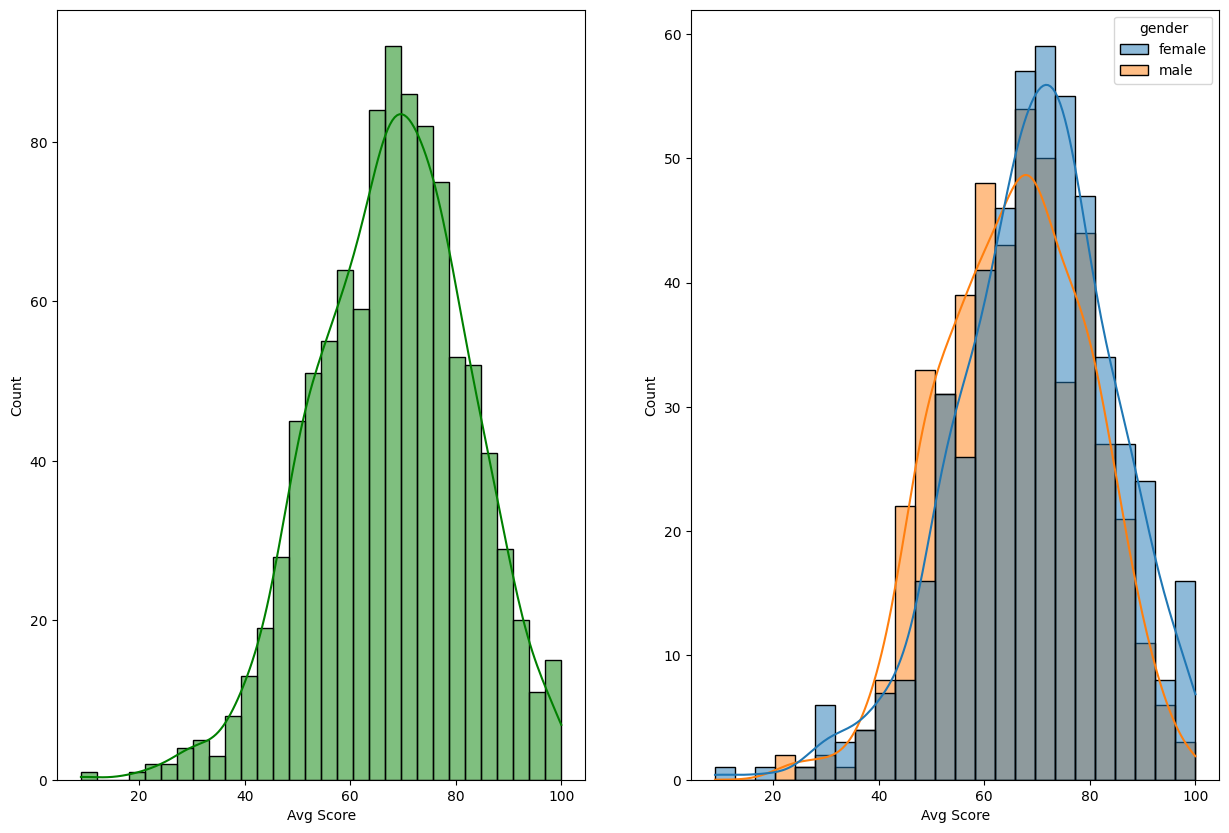

In [59]:
fig , axs = plt.subplots(1,2, figsize=(15,10))
plt.subplot(121)
sns.histplot(data=df , x='Avg Score' , bins = 30 , kde = True , color ='g')
plt.subplot(122)
sns.histplot(data = df , x='Avg Score' , kde = True , hue = 'gender')
plt.show()

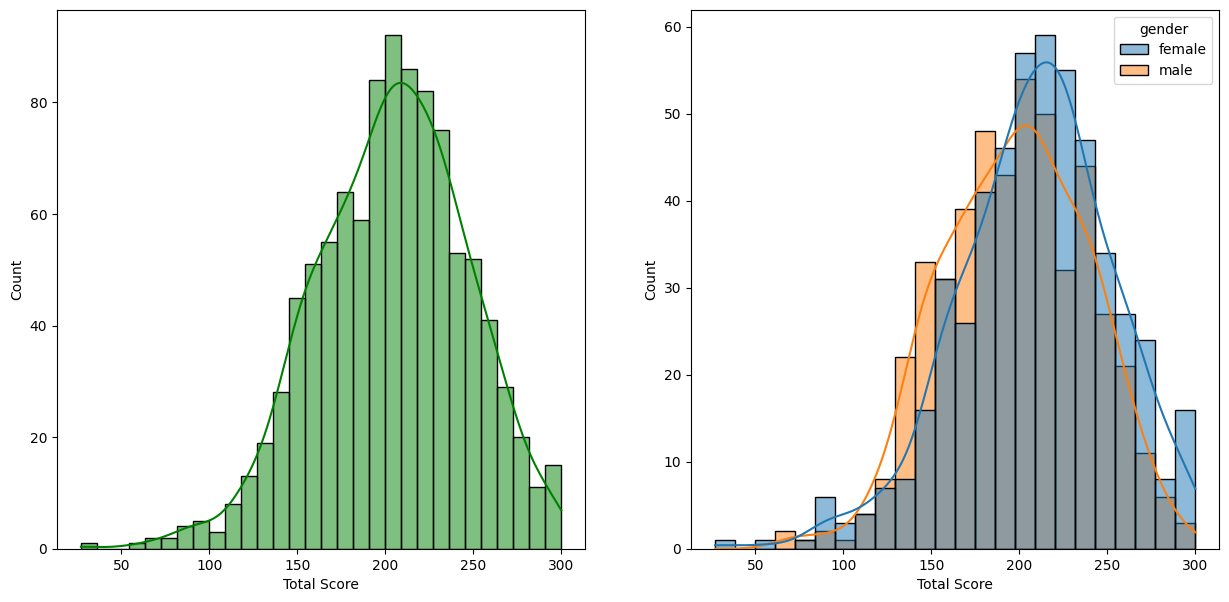

In [60]:

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total Score',kde=True,hue='gender')
plt.show()

<h4>Insights</h4>
<ul><li>Female Students tend to perform well then male students.
</li></ul>

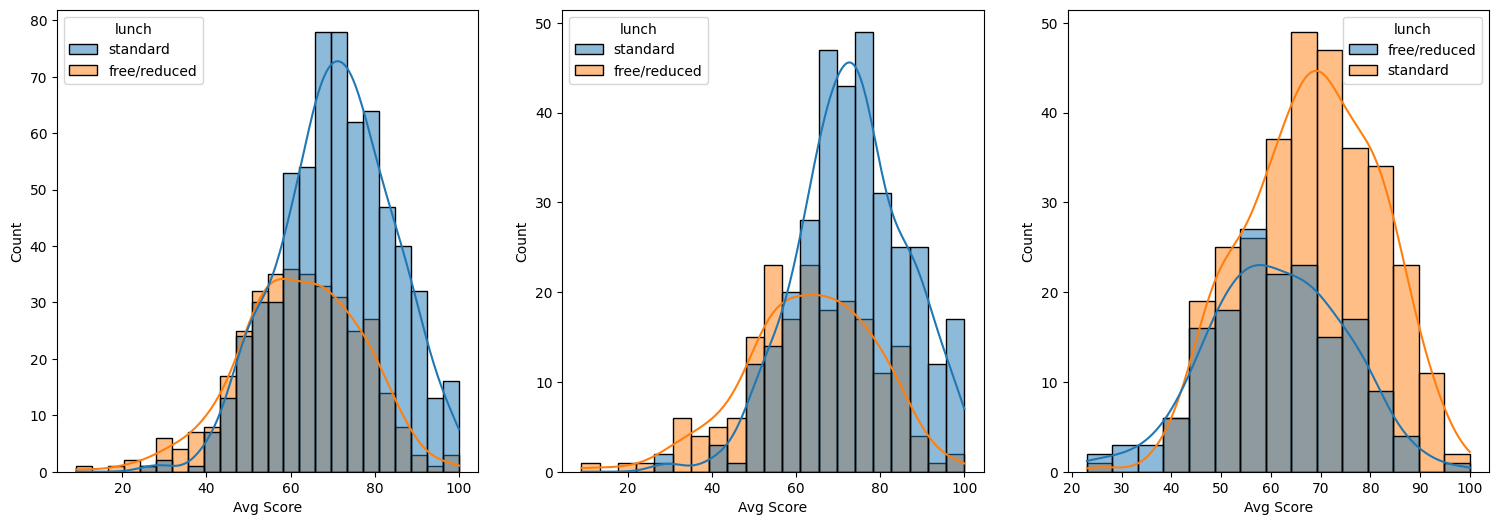

In [61]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Avg Score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Avg Score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Avg Score',kde=True,hue='lunch')
plt.show()

<h4>Insights</h4>
<ul><li>Standard lunch helps perform well in exams.</li>
<li>Standard lunch helps perform well in exams be it a male or a female.</li></ul>

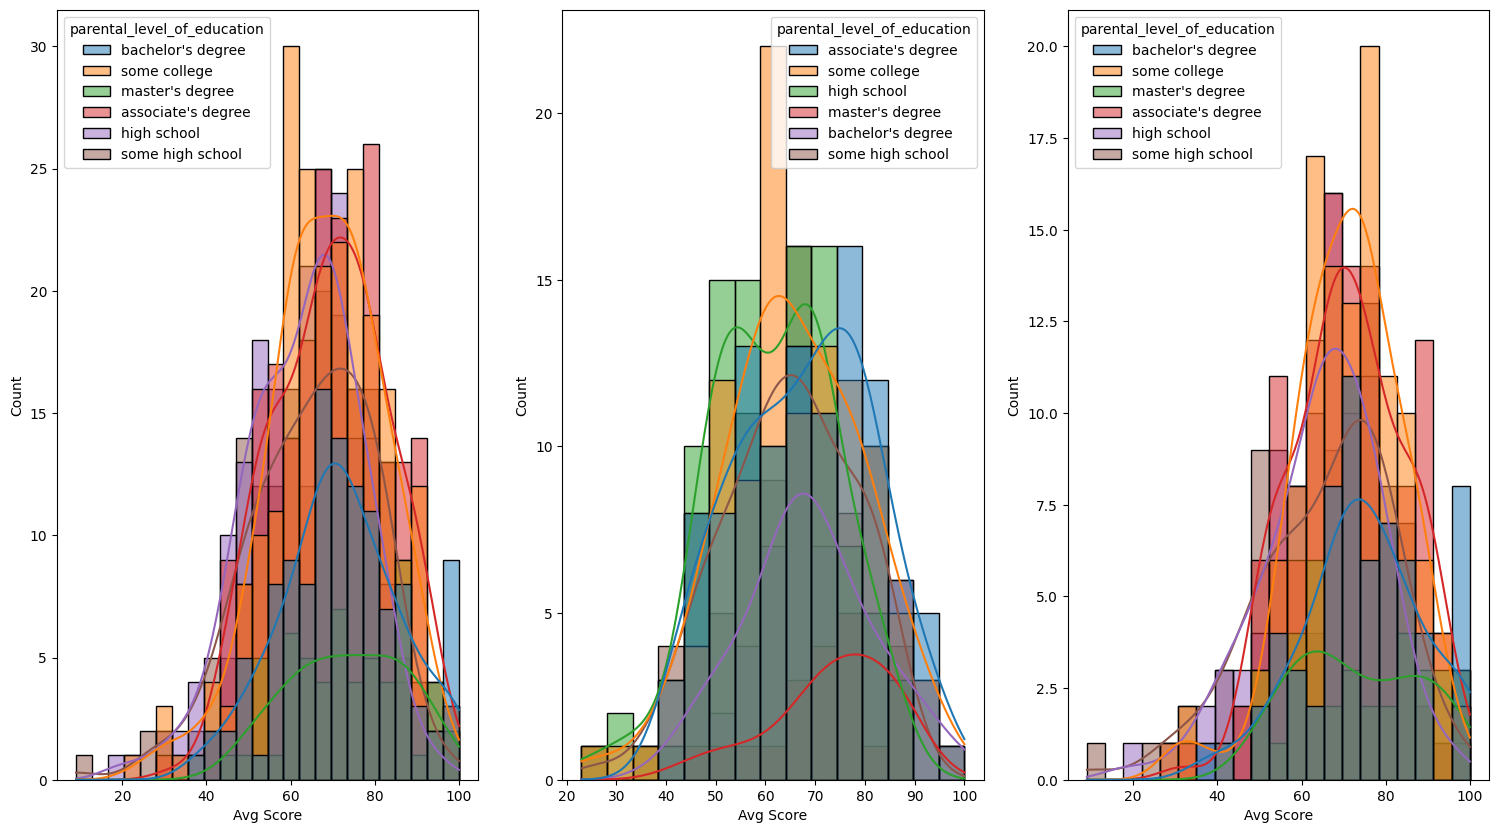

In [62]:

plt.subplots(1,3,figsize=(25,10))
plt.subplot(141)
ax =sns.histplot(data=df,x='Avg Score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Avg Score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Avg Score',kde=True,hue='parental_level_of_education')
plt.show()

<h4>Insights</h4>
<ul>
<li>In general parent's education don't help student perform well in exam.</li>
<li>2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam</li>
<li>3rd plot we can see there is no effect of parent's education on female students.</li>
</ul>

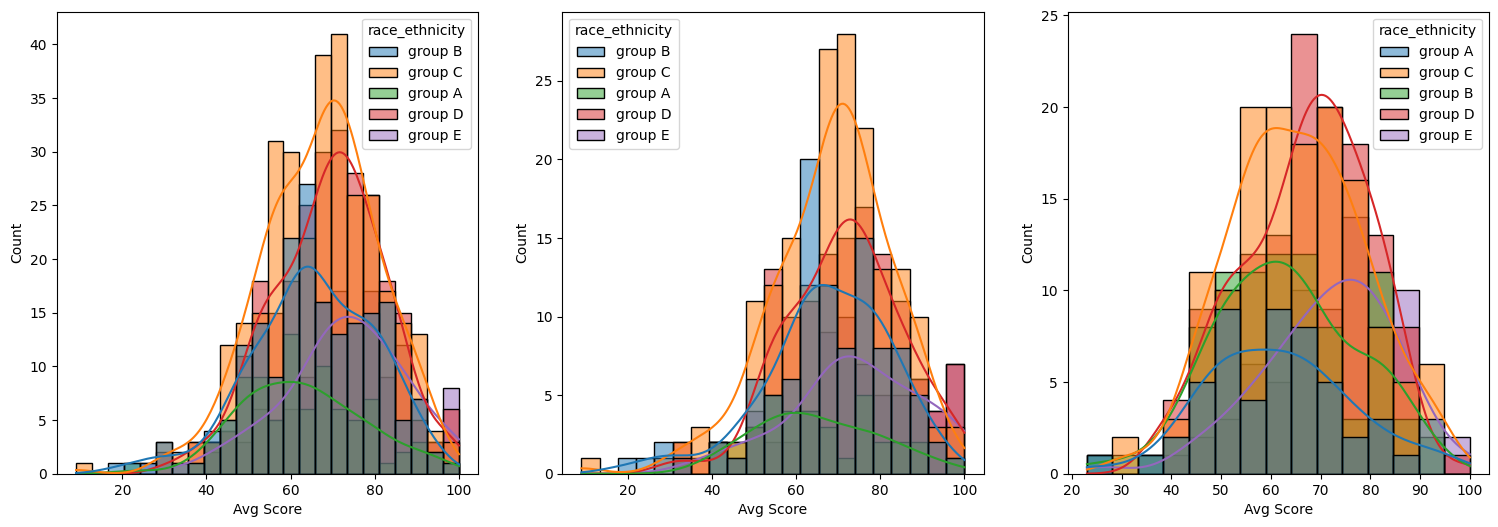

In [63]:

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Avg Score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Avg Score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Avg Score',kde=True,hue='race_ethnicity')
plt.show()

<h4>Insights</h4>
<ul>
<li>Student of group A and group B tends to perform poorly in exam.</li>
<li>Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female</li>
</ul>

<h3>4.2 Maximumum score of students in all three subjects</h3>

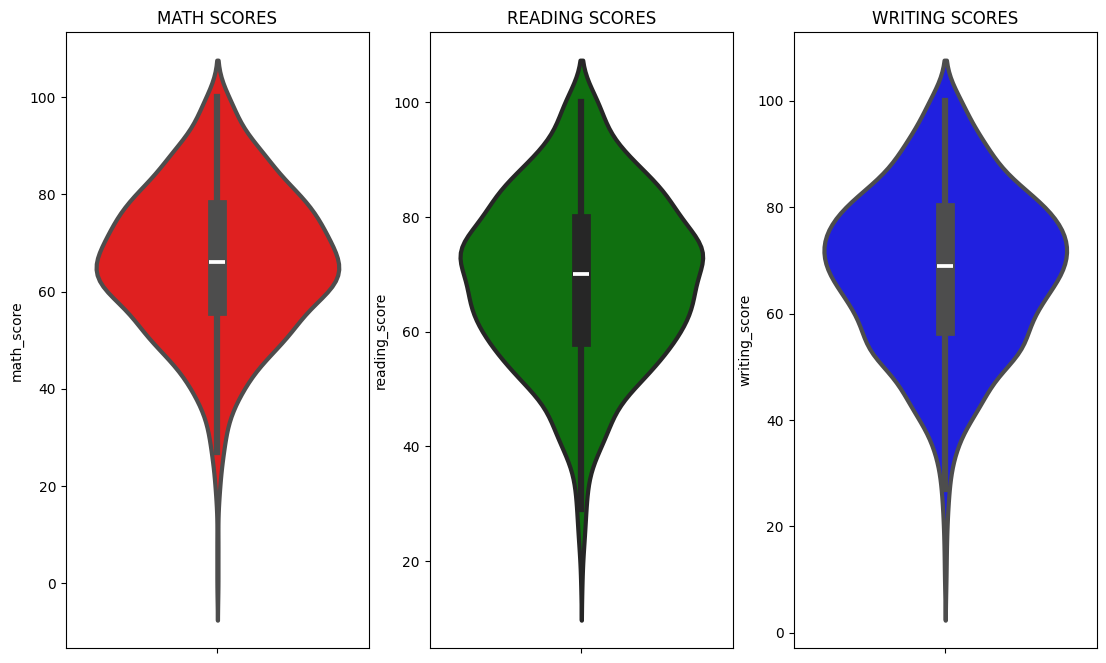

In [64]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

<h4>Insights</h4>
<ul><li>From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80</li></ul>

<h3>4.3 Multivariate analysis using pieplot</h3>

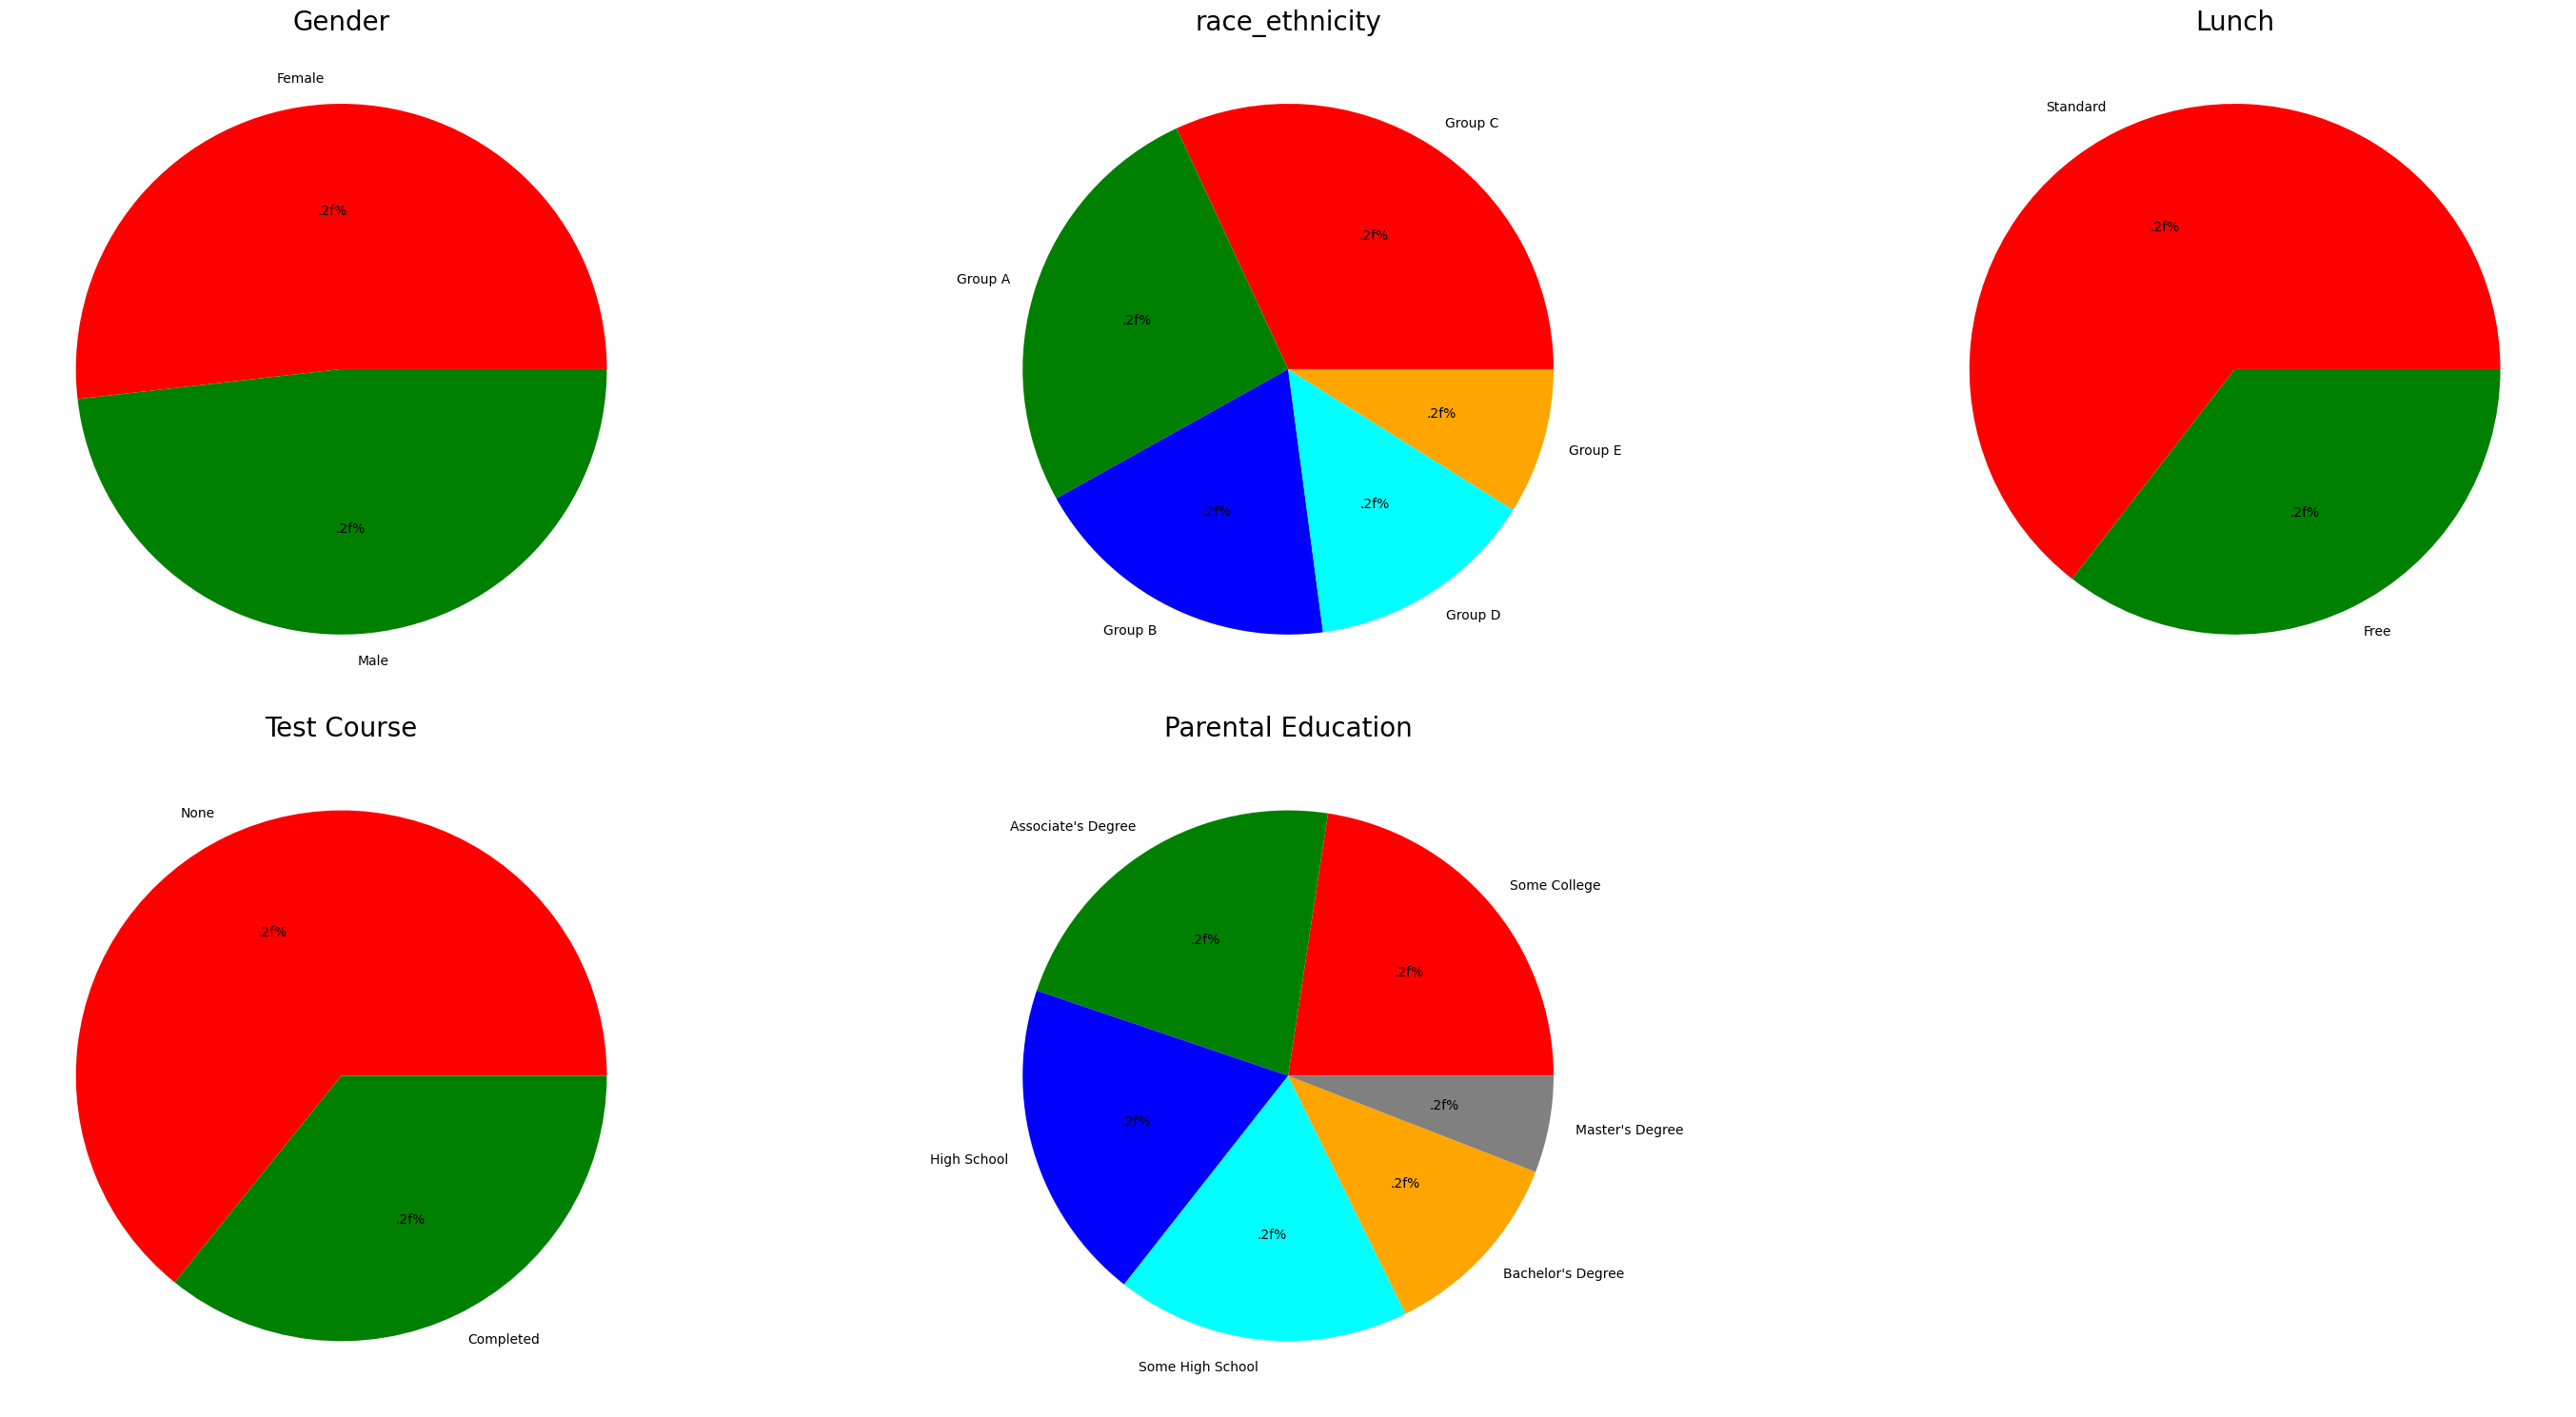

In [65]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (30, 15)

plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct=".2f%%")
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group A', 'Group B', 'Group D', 'Group E'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct=".2f%%")
plt.title('race_ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct=".2f%%")
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct=".2f%%")
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=color, labels=labels, autopct=".2f%%")
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

<h4>Insights</h4>
<ul>
<li>Number of Male and Female students is almost equal</li>
<li>Number students are in Group C</li>
<li>Number of students who have standard lunch are greater</li>
<li>Number of students who have not enrolled in any test preparation course is greater</li>
<li>Number of students whose parental education is "Some College" id greater followed closely by "Associate's Degree"</li>
</ul>

<h3>4.4 Feature Wise Visualization</h3>
<h4>4.4.1 Gender Column</h4>
<ul>
    <li>How is distribution of Gender?</li>
    <li>Is gender has any impact on student's performance?</li>
</ul>

<h3>UNIVARIATE ANALYSIS (How is distriburion of Gender ?)</h3>

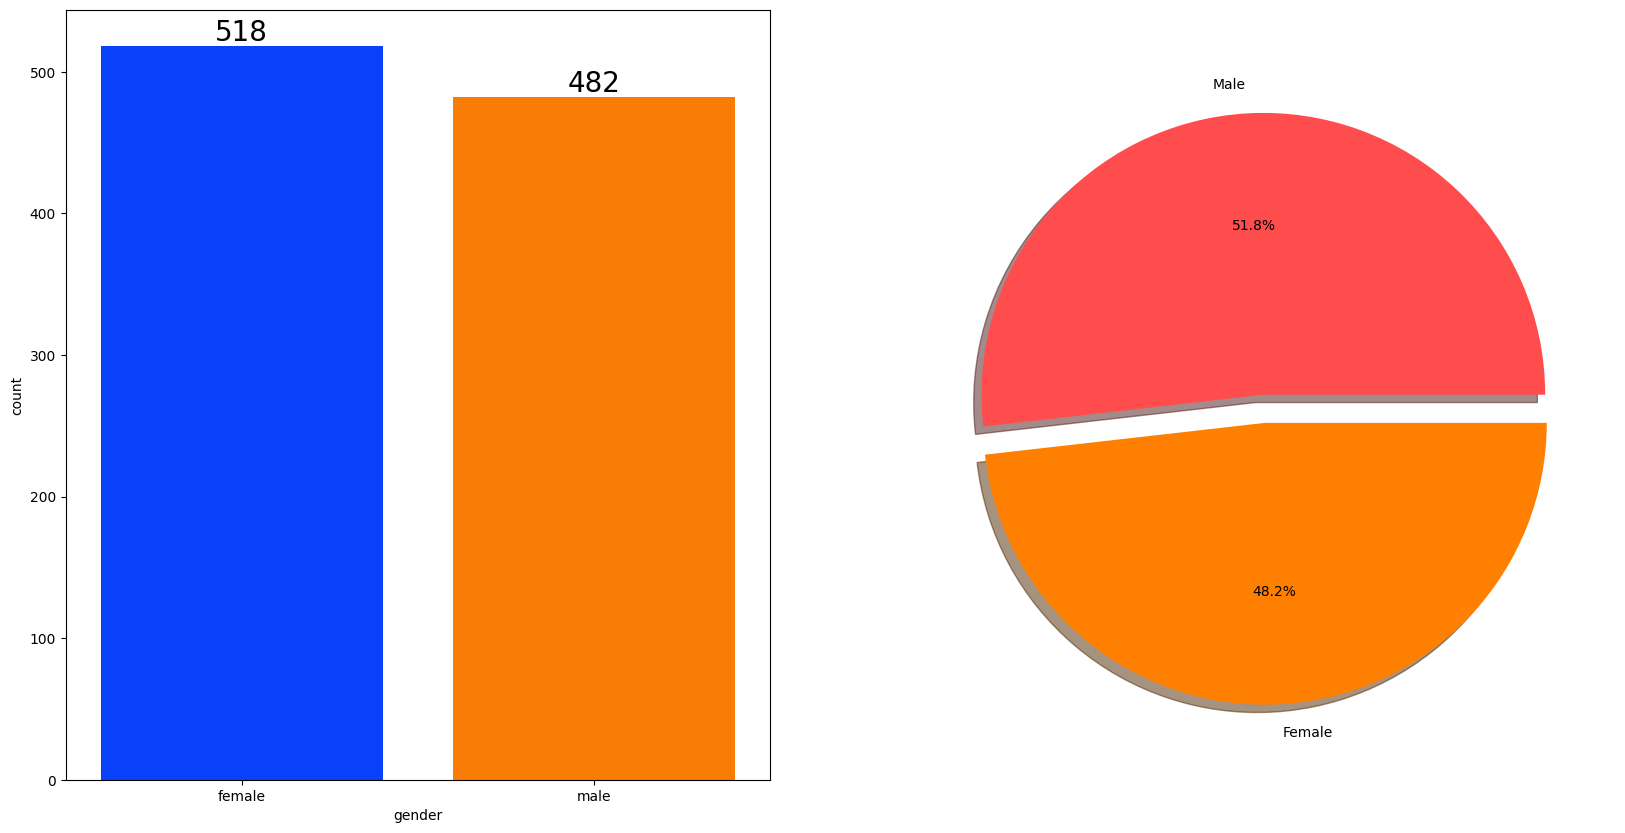

In [69]:
f , ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'] , data=df , palette='bright' , ax=ax[0],
              saturation=0.95)
for cotainer in ax[0].containers:
    ax[0].bar_label(cotainer,color='black', size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

<h4>Insights</h4>
<ul><li>Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)</li></ul>

<h3>BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )</h3>

In [ ]:
gender_group = df.groupby('gender').mean()
gender_group